# k-Nearest Neighbors

In [25]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, neighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

# Manipulate Data Train 

In [39]:
train = pd.read_csv("D:/Master ML/1-First Semester/4- Data Analysis Tools/7-kaggle_practice/kaggle_practice/train.csv")

train.drop (['MSZoning' , 'Street' , 'Alley', 'LotShape', 'LandContour' , 'Utilities' , 'LotConfig' , 'LandSlope' , 'Neighborhood',
            'Condition1' , 'Condition2', 'BldgType' , 'HouseStyle' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st',
             'Exterior2nd' , 'MasVnrType' , 'ExterQual' , 'ExterCond' , 'Foundation' , 'BsmtQual' , 'BsmtCond' ,
             'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'Heating' , 'HeatingQC' , 'CentralAir' , 'Electrical' ,
             'KitchenQual' , 'Functional' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 
             'PavedDrive' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'SaleCondition','Id','SaleType'
            ] , 1 , inplace = True)

train = train.replace(0, np.NaN)     # mark zero values as missing or NaN
train.fillna(0, inplace=True)
#train.dropna(inplace=True)    # mark zero values as missing or NaN  .fillna(0) - df.fillna(0)
print(train.shape)                # summarize the number of rows and columns in the dataset

train.columns = train.columns.str.lower()  # Solving Error : DataFrame' object has no attribute 'to_numeric

train.replace('NA', -99999 , inplace =True)
#train.drop (['Id'] , 1 , inplace = True)

(1460, 37)


# Manipulate Data Test

In [40]:
test = pd.read_csv("D:/Master ML/1-First Semester/4- Data Analysis Tools/7-kaggle_practice/kaggle_practice/test.csv")

test.drop (['MSZoning' , 'Street' , 'Alley', 'LotShape', 'LandContour' , 'Utilities' , 'LotConfig' , 'LandSlope' , 'Neighborhood',
            'Condition1' , 'Condition2', 'BldgType' , 'HouseStyle' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st',
             'Exterior2nd' , 'MasVnrType' , 'ExterQual' , 'ExterCond' , 'Foundation' , 'BsmtQual' , 'BsmtCond' ,
             'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'Heating' , 'HeatingQC' , 'CentralAir' , 'Electrical' ,
             'KitchenQual' , 'Functional' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 
             'PavedDrive' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'SaleCondition','Id','SaleType'
           ] , 1 , inplace = True)

# ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

test = test.replace(0, np.NaN)     # mark zero values as missing or NaN
test.fillna(0, inplace=True)
#train.dropna(inplace=True)             # mark zero values as missing or NaN  .fillna(0) - df.fillna(0)
print(test.shape)  

test.columns = test.columns.str.lower()  # Solving Error : DataFrame' object has no attribute 'to_numeric


test.replace('NA', -99999 , inplace =True)
#train.drop (['Id'] , 1 , inplace = True)

(1459, 36)


#  Proceeding Functions

In [54]:
x= np.array(train.drop(['saleprice'], 1))   # features
y= np.array(train['saleprice'])             # target

o = x_train, x_test , y_train, y_test = cross_validation.train_test_split(x,y,test_size=0.2)

KNN = neighbors.KNeighborsRegressor()       # clf = neighbors.KNeighborsClassifier()

In [55]:
fit = KNN.fit(x_train, y_train)             # Fit - x , y Train
predxTest = fit.predict(x_test)             # Predict - x Test

In [57]:
r2 = r2_score(y_test, predxTest)            # Score - Coefficient of determination
mse = mean_squared_error(y_test, predxTest) # Mean Square Error

In [58]:
print ("R2 Score Test - Accuracy Test : " , r2)
print ("Mean Square Error : " , mse)

R2 Score Test - Accuracy Test :  0.656223906517
Mean Square Error :  2413159478.9


In [59]:
cv = cross_validation.cross_val_score(KNN, x, y)
print ("CV Score : Mean = %.7g | Std = %.7g | Min = %.7g | Max = %.7g" %
      (np.mean(cv),np.std(cv),np.min(cv),np.max(cv)))

CV Score : Mean = 0.6383631 | Std = 0.01871396 | Min = 0.6180021 | Max = 0.6631857


# Predict Features by Data Test

In [53]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier

features = ['mssubclass' , 'lotfrontage' , 'lotarea' ,'overallqual','overallcond','yearbuilt','yearremodadd',
            'masvnrarea' , 'bsmtfinsf1' , 'bsmtfinsf2','bsmtunfsf','totalbsmtsf','1stflrsf','2ndflrsf',
            'lowqualfinsf','grlivarea','bsmtfullbath','bsmthalfbath','fullbath','halfbath','bedroomabvgr',
            'kitchenabvgr' , 'fireplaces' ,'garageyrblt' , 'garagearea' , 'wooddecksf' , 'openporchsf' , 
            'enclosedporch' , '3ssnporch' , 'screenporch' , 'poolarea' , 'miscval' , 'mosold' , 'yrsold']


clf = neighbors.KNeighborsRegressor(n_neighbors=1)
clf.fit(train[features], train['saleprice'])
preds = clf.predict(test[features])

print ('prediction =' , preds)



prediction = [ 146800.  151500.  187500. ...,  176000.  115000.  274300.]


In [46]:
KNN.fit(train[features], train['saleprice'])
predTest = KNN.predict(test[features])

In [ ]:
r2 = r2_score(y_test, predTest)              # Score - Coefficient of determination
#mse = mean_squared_error(y_test, predTest)   # Mean Square Error

----------------------------------------------

# Another Solution

# Manipulate Data Train 

In [6]:
df = pd.read_csv("D:/Master ML/1-First Semester/4- Data Analysis Tools/7-kaggle_practice/kaggle_practice/train.csv")

df.drop (['MSZoning' , 'Street' , 'Alley', 'LotShape', 'LandContour' , 'Utilities' , 'LotConfig' , 'LandSlope' , 'Neighborhood',
            'Condition1' , 'Condition2', 'BldgType' , 'HouseStyle' , 'RoofStyle' , 'RoofMatl' , 'Exterior1st',
             'Exterior2nd' , 'MasVnrType' , 'ExterQual' , 'ExterCond' , 'Foundation' , 'BsmtQual' , 'BsmtCond' ,
             'BsmtExposure' , 'BsmtFinType1' , 'BsmtFinType2' , 'Heating' , 'HeatingQC' , 'CentralAir' , 'Electrical' ,
             'KitchenQual' , 'Functional' , 'FireplaceQu' , 'GarageType' , 'GarageFinish' , 'GarageQual' , 'GarageCond' , 
             'PavedDrive' , 'PoolQC' , 'Fence' , 'MiscFeature' , 'SaleCondition','Id','SaleType'
           ] , 1 , inplace = True)

df = df.replace(0, np.NaN)     # mark zero values as missing or NaN
df.fillna(0, inplace=True)
#train.dropna(inplace=True)    # mark zero values as missing or NaN  .fillna(0) - df.fillna(0)
print(df.shape)                # summarize the number of rows and columns in the dataset

df.columns = df.columns.str.lower()  # Solving Error : DataFrame' object has no attribute 'to_numeric

df.replace('NA', -99999 , inplace =True)

(1460, 37)


# Accuracy Train , Predict Features in Test

Neighbors: 1, Accuracy: 0.686948
Neighbors: 3, Accuracy: 0.686948
Neighbors: 5, Accuracy: 0.196271
Neighbors: 7, Accuracy: 0.000000
Neighbors: 9, Accuracy: 0.098135
Neighbors: 11, Accuracy: 0.000000
Neighbors: 13, Accuracy: 0.000000
Neighbors: 15, Accuracy: 0.000000
Neighbors: 17, Accuracy: 0.000000
Neighbors: 19, Accuracy: 0.098135
Neighbors: 21, Accuracy: 0.000000
Neighbors: 23, Accuracy: 0.000000


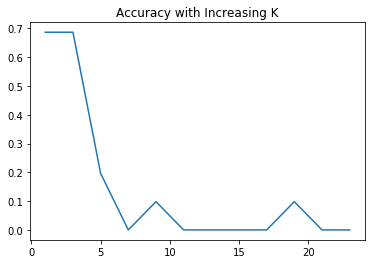

In [18]:
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier

#df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]


features = ['mssubclass' , 'lotfrontage' , 'lotarea' ,'overallqual','overallcond','yearbuilt','yearremodadd',
            'masvnrarea' , 'bsmtfinsf1' , 'bsmtfinsf2','bsmtunfsf','totalbsmtsf','1stflrsf','2ndflrsf',
            'lowqualfinsf','grlivarea','bsmtfullbath','bsmthalfbath','fullbath','halfbath','bedroomabvgr',
            'kitchenabvgr' , 'fireplaces' ,'garageyrblt' , 'garagearea' , 'wooddecksf' , 'openporchsf' , 
            'enclosedporch' , '3ssnporch' , 'screenporch' , 'poolarea' , 'miscval' , 'mosold' , 'yrsold']

results = []
for n in range(1, 25, 2):
    clf = KNeighborsClassifier(n_neighbors=n)   #clf = neighbors.KNeighborsRegressor(n_neighbors=n)
    
    clf.fit(train[features], train['saleprice'])
    preds = clf.predict(test[features])
    accuracy = np.where(preds==test['saleprice'], 1, 0).sum() / float(len(test))*100
    print ("Neighbors: %d, Accuracy: %3f" % (n, accuracy))

    results.append([n, accuracy])

results = pd.DataFrame(results, columns=["n", "accuracy"])

pl.plot(results.n, results.accuracy)
pl.title("Accuracy with Increasing K")
pl.show()

#pred = np.array(o)
#pred = example_measures.reshape(1,-1)

#prediction = clf.predict(pred)
#print ('prediction =' , prediction)

---------------------------------------------------------------------------

---------------------------------------------------------------------------

Note :
-----
This instructions shoud do for train and test sets for same represantation

1. Find categorical features
    - Transform it to quantitive representation (one of them):
    
        a) onehotencoding (sklearn);
        
        b) binarization (pandas.get_dummies);
        
        
2. Quantitive features
    - eliminate Nan values:
    
        a) replace for mean or median value;
        
        b) prediction for Nan values (I don't know exactly)
        
        
    - find outliers for every quantitive feature (column) using some technic
    
        as example 3sigma rule(https://en.wikipedia.org/wiki/68–95–99.7_rule) - only for Normal distribution
        
    - eliminate outliers in data:
    
        replace for some adequate value (mean, median, max, min)
    
    also you can transform quantitive features to Normal distribution, if it isn't (sometimes it helps)
    and scale to [0, 1] interval
    
3. Now we can try to learn some ML models
    
    - choose a model (as example kNN);
    
    - do cross-validation for fair results
    
Code example for cross-validation:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

reg_knn = KNeighborsRegressor(n_jobs=-1)

param_grid_knn = {
    'n_neighbors':range(7, 9),
    'p':range(2, 4)
}

reg_knn_cv = GridSearchCV(reg_knn, param_grid=param_grid_knn, cv=5, error_score='rmse', n_jobs=-1)

reg_knn_cv.fit(X_train, y_train)

reg_knn_cv.best_params_
reg_knn_cv.best_score_